<a href="https://colab.research.google.com/github/chandansinghthakur/ML_assignments/blob/main/Assignment_3_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Loading Data and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [33]:
url = r'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)

In [34]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
df = titanic[['Pclass',  'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Survived']]

In [36]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [37]:
df.shape

(891, 7)

In [38]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [39]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

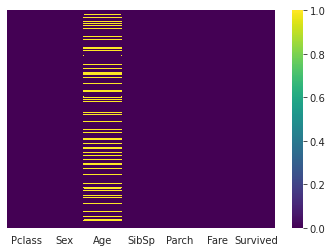

In [40]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

From the heatmap, we can observe that the age column have many null values so we have to categorize the age column instead of dropping this column.

# Feature_Engineering

In [41]:
def imputed_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [42]:
df['Age'] = df[['Age', 'Pclass']].apply(imputed_age,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [44]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

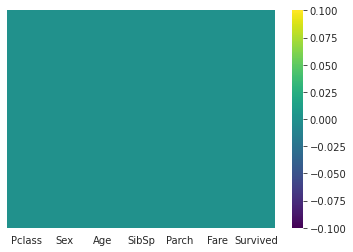

In [45]:
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

In [46]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.066409,0.523008,0.381594,32.204208,0.383838
std,0.836071,13.244532,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


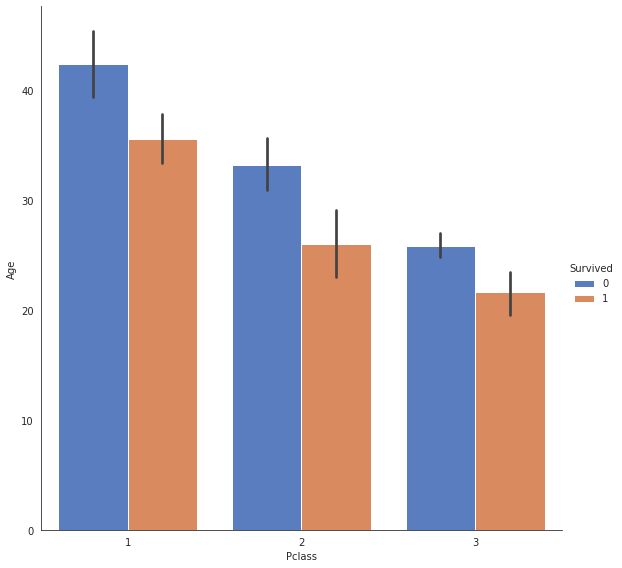

In [47]:
sns.set_style('white')
sns.catplot(x='Pclass', y='Age', data=df, kind='bar', height=8, palette='muted', hue='Survived')

In [48]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [49]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [51]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [52]:
X['Sex'] = pd.get_dummies(X['Sex']).values


In [53]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,24.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [55]:
x_train.shape

(623, 6)

In [56]:
y_train.shape

(623,)

In [57]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [58]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [59]:
log_reg.score(x_test,y_test)

0.8022388059701493

In [60]:
# Applying Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)


DecisionTreeClassifier()

In [61]:
dtc.score(x_test,y_test)

0.7761194029850746

In [62]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
y_pred = dtc.predict(x_test)

In [64]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0])

In [65]:
Acc_score = accuracy_score(y_test,y_pred)
Acc_score

0.7761194029850746

In [66]:
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[127,  32],
       [ 28,  81]])

In [69]:
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       159
           1       0.72      0.74      0.73       109

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [70]:
# Standardizing the X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)


In [71]:
x_train,y_train, x_test, y_test = train_test_split(X_transform, y ,test_size=0.33, random_state=110)

In [72]:
x_train

array([[-0.36936484, -0.73769513,  0.97707157, -0.4745452 , -0.47367361,
        -0.38667072],
       [-0.36936484, -0.73769513, -0.38274316, -0.4745452 , -0.47367361,
        -0.38667072],
       [-1.56610693,  1.35557354,  0.52379999, -0.4745452 , -0.47367361,
         2.08251241],
       ...,
       [-1.56610693,  1.35557354,  0.67489052, -0.4745452 , -0.47367361,
         0.96235332],
       [ 0.82737724, -0.73769513, -0.38274316, -0.4745452 , -0.47367361,
        -0.48944219],
       [ 0.82737724,  1.35557354, -0.38274316,  0.43279337,  0.76762988,
        -0.19824428]])

In [73]:
y_train

array([[ 0.82737724, -0.73769513,  0.07052841, -0.4745452 , -0.47367361,
        -0.50244517],
       [ 0.82737724, -0.73769513, -0.38274316, -0.4745452 , -0.47367361,
        -0.49279663],
       [ 0.82737724,  1.35557354, -0.83601474,  0.43279337, -0.47367361,
        -0.29002422],
       ...,
       [ 0.82737724, -0.73769513, -0.38274316,  0.43279337, -0.47367361,
        -0.16216896],
       [ 0.82737724, -0.73769513, -0.38274316, -0.4745452 , -0.47367361,
        -0.50244517],
       [ 0.82737724, -0.73769513,  0.10830104, -0.4745452 , -0.47367361,
        -0.48633742]])

In [74]:
# Using PCA to increase model accuracy
from sklearn.decomposition import PCA
pca = PCA()
principalComponent = pca.fit_transform(X_transform)


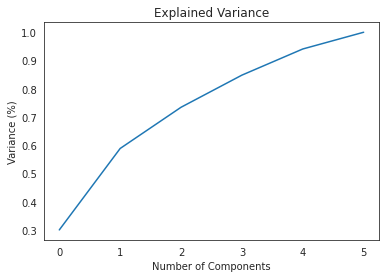

In [75]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [76]:
pca = PCA(n_components=5)
new_df = pca.fit_transform(X_transform)

principal_x = pd.DataFrame(new_df, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [77]:
principal_x

,PC1,PC2,PC3,PC4,PC5
0,-1.186586,0.458355,0.579065,0.284109,-0.358106
1,1.889875,-0.704002,-0.745372,0.112088,-1.019341
2,-0.601888,0.285849,-1.591132,-0.058536,-0.311672
3,1.617648,-0.560689,-0.837596,0.113575,-1.032969
4,-1.177517,-0.545217,0.300918,-0.323609,0.100799
...,...,...,...,...,...
886,-0.580358,-0.678690,0.310160,0.350409,0.161537
887,0.882515,-0.360395,-1.451139,0.900046,-0.270710
888,0.577174,2.044472,-0.872957,-1.038250,0.731296
889,0.274491,-1.110257,0.423358,0.744964,0.167046


In [84]:
x_train, y_train, x_test, y_test = train_test_split(principal_x, y, test_size=0.33, random_state=110)
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()


In [85]:
Dtc.fit()

ValueError: ignored

In [ ]:
Dtc.score(x_test,y_test)